In [1]:
from session_validation.validation_session_executer import validation_execution
from session_validation.session_params import SessionParams
from session.session import Session
import pandas as pd


config = SessionParams.config_231
config['training_config']['epochs'] = 6
session, validation_df = validation_execution(**config)


2022-07-05 15:49:30.969869   [DataAugmenter] Added a Convolve Augmenter with window_type=bohman and window_size=11
2022-07-05 15:49:30.970869   [Session] Initializing ...
2022-07-05 15:49:30.970869   [Session] Syncing existing training runs ...
2022-07-05 15:49:30.970869   [Session] Checking for previously run epoch logs and stored weights ...
2022-07-05 15:49:30.973908   [Session] Found log indicating previous training until epoch 6.
2022-07-05 15:49:30.974873   [Session] Found weights from epoch 6 in C:\Informatik\workspaces\workspace_python\AI-Cup\models\880000880231\ckpts\cp-0006.ckpt
2022-07-05 15:49:30.975911   [Session] Synced logs and weights at epoch 6.
2022-07-05 15:49:30.975911   [Session] Finished initialization.
2022-07-05 15:49:30.975911   [Session] Started initialize subroutine ...
2022-07-05 15:49:30.975911   [Session] Retrieving model ...
2022-07-05 15:49:32.156584   [Session] Retrieved model with 727314 parameters successfully.
2022-07-05 15:49:32.157584   [Session] C

In [2]:
session.validation_generator.index_file

'C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\gait\\csv_index_gait_evaluation.txt'

Calculating for original


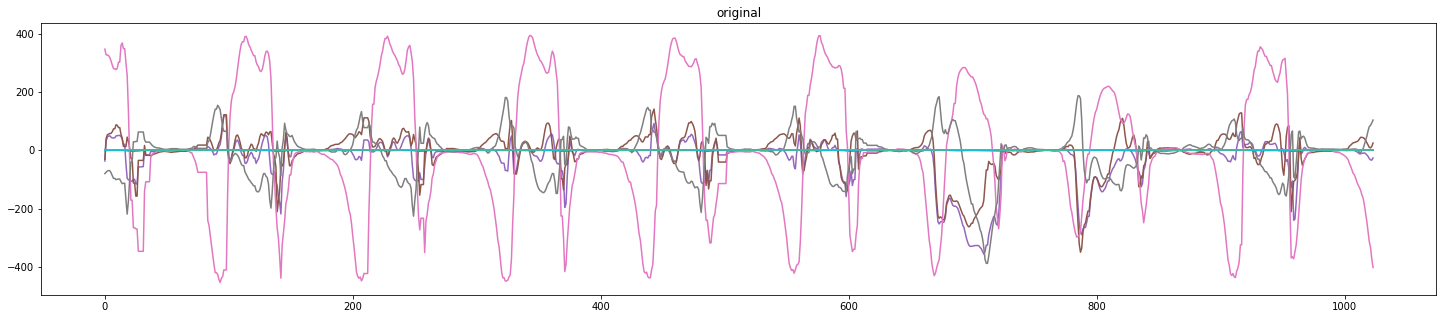

Calculating for min_max_symmetrical


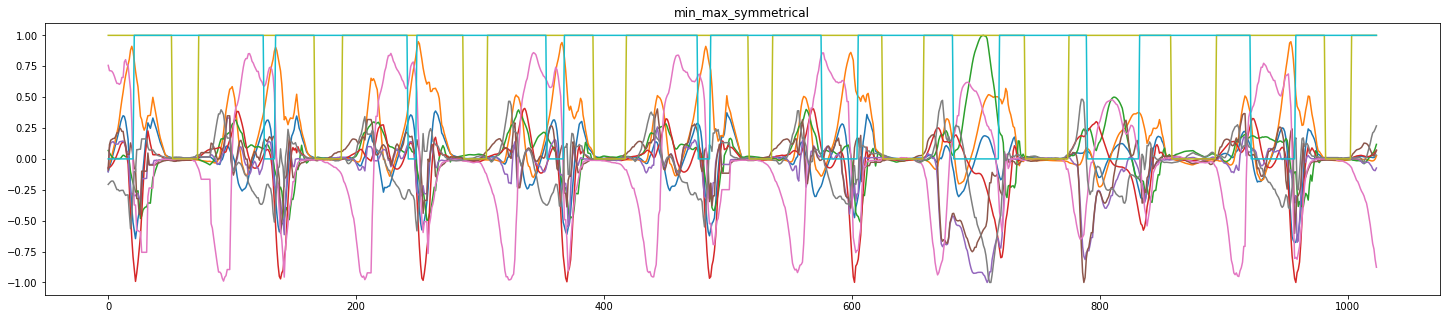

Calculating for tanh_estimator


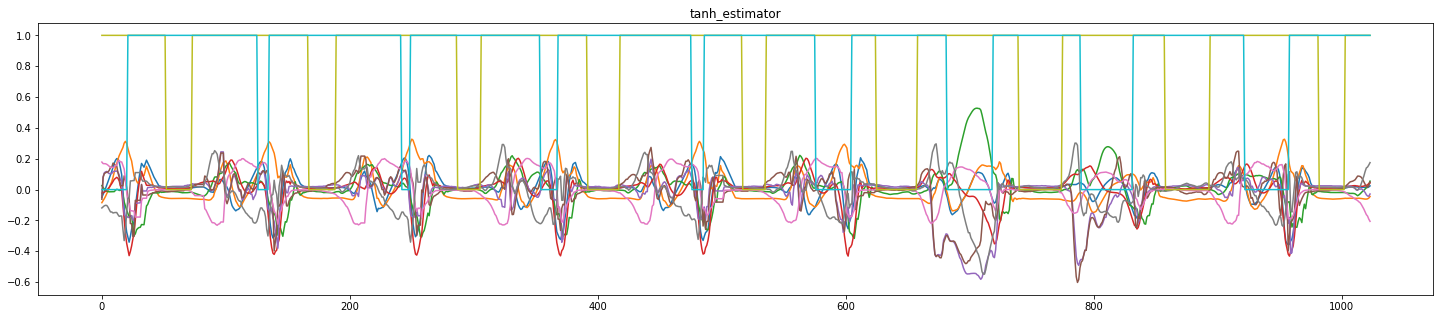

Calculating for standardization


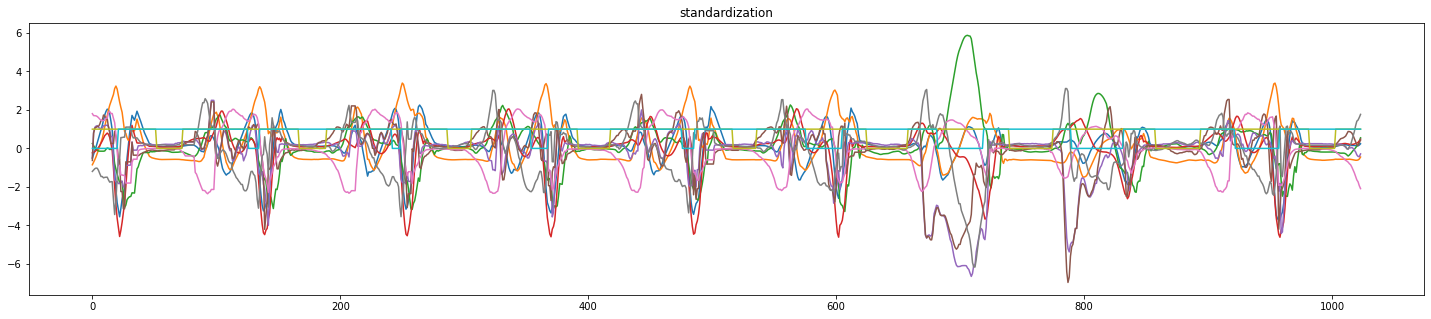

Calculating for median_normalization


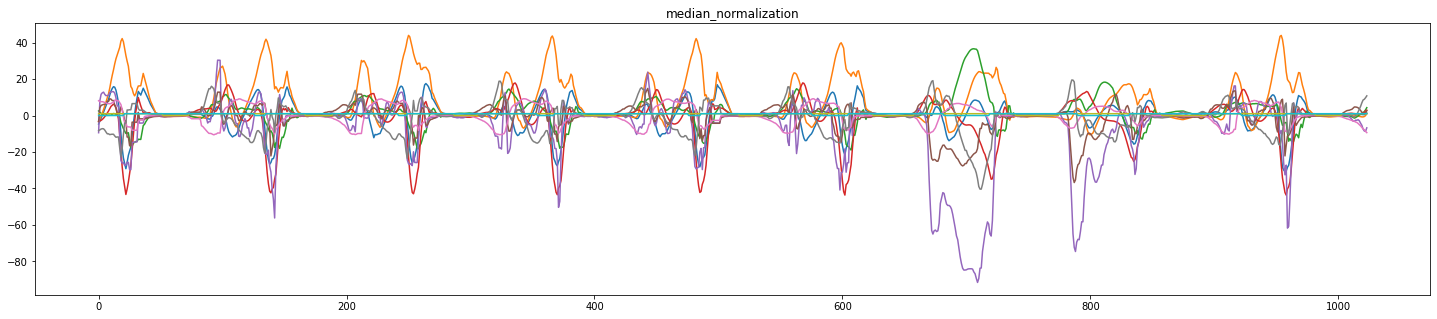

Calculating for sigmoid_normalization


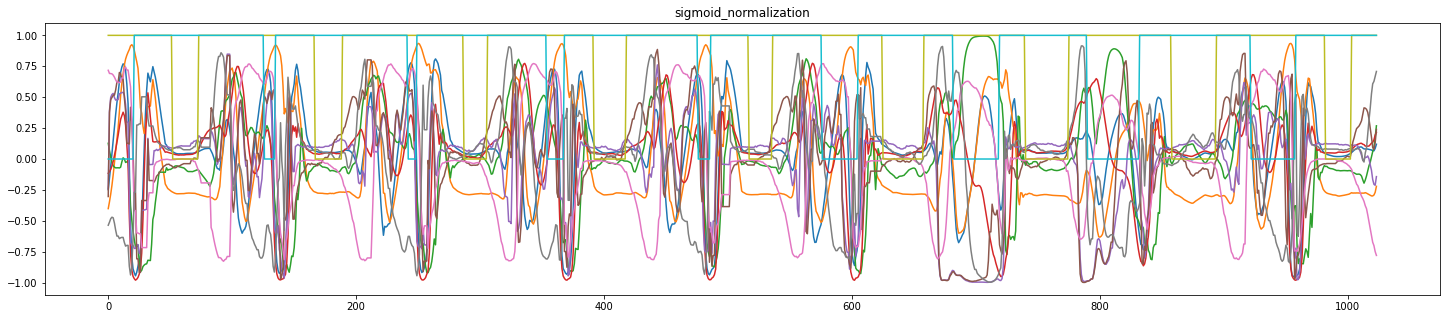

Calculating for decimal_scaling_normalization


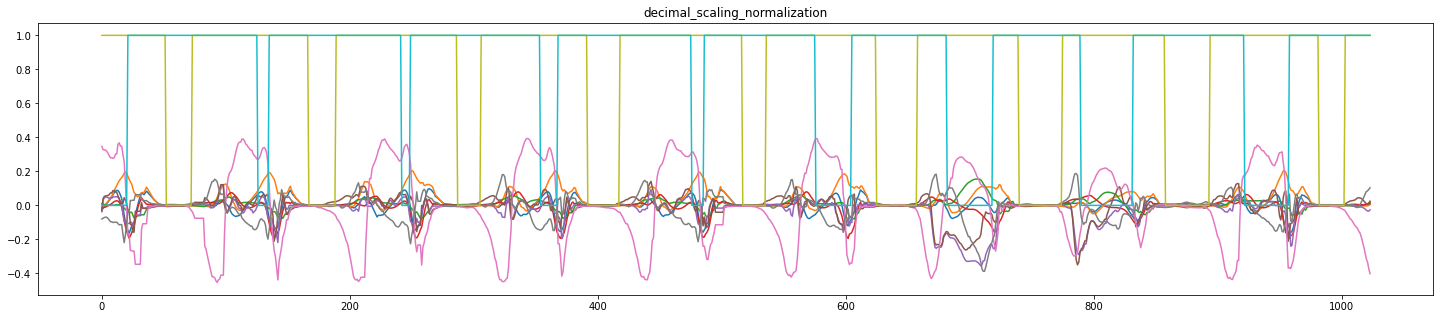

Calculating for min_max_standardization


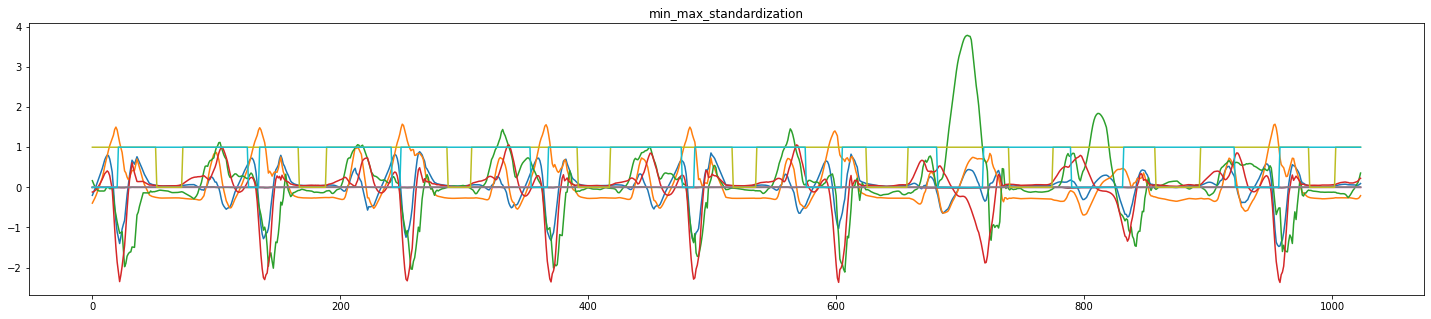

In [8]:
import matplotlib.pyplot as plt
from data_processing.data_normalization_params import DataNormalizationParams
plt.rcParams["figure.figsize"] = (25,5 )

for normalization_function in DataNormalizationParams.options['normalization_function']:
    print(f'Calculating for {normalization_function}')
    session.validation_generator.normalization_function = normalization_function
    X, y = session.validation_generator.__getitem__(5)
    plt.plot(X[0,:,:8])
    #plt.plot(y[0,:,:])
    plt.title(normalization_function)
    plt.show()